

# Homework 1: Basic Python, Arrays, and DataFrames

## Due Sunday, October 13th at 11:59PM

Welcome to Homework 1! This week's homework will cover basic Python, arrays, and DataFrames. You can find additional help on these topics in [Chapter 1](https://www.inferentialthinking.com/chapters/01/what-is-data-science.html) of Computational and Inferential Thinking and [BPD 1-11](https://notes.dsc10.com/01-getting_started/tools.html) in the `babypandas` notes.


### Instructions

Remember to start early and submit often. You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (the schedule can be found [here](https://dsc10.com/calendar)) or Ed. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

In [262]:
# Please don't change this cell, but do make sure to run it.
import babypandas as bpd
import matplotlib.pyplot as plt
import numpy as np
import otter
grader = otter.Notebook()

plt.style.use('ggplot')

## 1. Characters in *The Great Gatsby* 💃🍸🏰🌃

In Lecture 1, we counted the number of times that the characters Amy, Beth, Jo, Meg, and Laurie were named in each chapter of the classic book _Little Women_. In this question, we'll look at another classic book – _The Great Gatsby_ by F. Scott Fitzgerald. In 2021, the copyright protections of the original book (but not the 2013 film starring Leonardo DiCaprio!) expired, and so sites like Project Gutenberg are now able to post [copies of the book](https://www.gutenberg.org/cache/epub/64317/pg64317-images.html) without violating any copyright laws. 

<center><img src=images/the-great-gatsby.png width=400><br>(<a href="https://study.com/academy/lesson/video/main-characters-in-the-great-gatsby-character-list-analysis.html">source</a>)</center>

Four of the main characters in _The Great Gatsby_ are Nick Carraway (👀), Tom Buchanan (😡), Daisy Buchanan(🌸), and Jay Gatsby (✨).

Below, we've written code that shows the number of mentions of each of these four characters in each chapter of the book. However, instead of displaying this information in a line chart, as was done in Lecture 1, we will use a bar chart.

Run the cell below to generate this bar chart. This cell contains code that hasn't yet been covered in the course. It isn't expected that you'll understand the code, but you should be able to interpret the bar chart it generates.

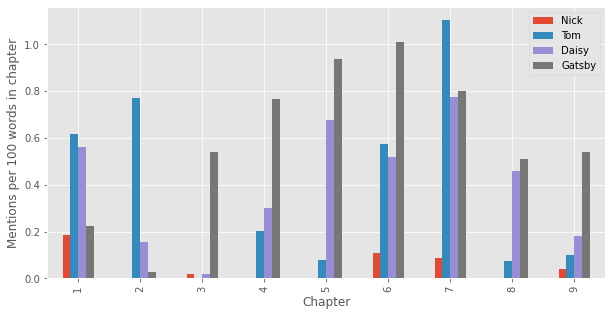

In [263]:
# Open the book and split it into chapters.
book_file = 'data/the-great-gatsby.txt'
raw_book = open(book_file, encoding="utf-8").read()
end_pos = raw_book.index('*** END OF THE PROJECT GUTENBERG EBOOK THE GREAT GATSBY ***') 

chapters = raw_book[:end_pos].split('Chapter ')[1:]

# Find the number of words in each chapter, in hundreds.
chapter_lengths = (np.array([len(c.split(' ')) for c in chapters]) / 100)

# Find the number of mentions per 100 words for each character and chapter.
characters = bpd.DataFrame().assign(
    Chapter=np.arange(1, 10),
    Nick=np.char.count(chapters, 'Nick') / chapter_lengths,
    Tom=np.char.count(chapters, 'Tom') / chapter_lengths,
    Daisy=np.char.count(chapters, 'Daisy') / chapter_lengths,
    Gatsby=np.char.count(chapters, 'Gatsby') / chapter_lengths
)

characters.plot(kind='bar', x='Chapter', figsize=(10, 5));
plt.ylabel('Mentions per 100 words in chapter');

Looking at the bar chart, we see that the height of the bar for Nick in Chapter 1 is approximately 0.19 and the y-axis of this graph is “Mentions per 100 words in chapter”. This means that 0.19 of every 100 words in Chapter 1 are `"Nick"`. In other words, $0.19\%$ of the words in Chapter 1 are `"Nick"`.

**Question 1.1.** The following sentence is included in *The Great Gatsby*:

> Tom Buchanan, who had been hovering restlessly about the room, stopped and rested his hand on my shoulder. "What you doing, Nick?"


Based only on the graph above, in which chapter(s) of *The Great Gatsby* **could** this sentence appear? Assign the variable `gg_part1` to a `list` of `int`s, each one a number 1 through 9 representing a chapter. For example, if you believe this sentence could only appear in chapters 1 or 2, assign `gg_part1` to `[1, 2]`.

In [264]:
gg_part1 = [1,6,7,9]

In [265]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** Nick is mentioned 10 times in Chapter 1. Based on the bar chart alone, estimate the number of times Tom is mentioned in Chapter 1. You don't need to write any code for this problem!

Assign the variable `gg_part2` to 1, 2, 3, 4, or 5 corresponding to the best answer choice below. Remember to input your answer as a **number from 1-5 corresponding to the option numbers below, and not to the number of times Tom is mentioned.** For example, if you think Tom is mentioned 18 times, you should set `gg_part2` to 1, not 18.

1. 18 times
1. 21 times
1. 30 times
1. 33 times
1. 41 times


In [266]:
gg_part2 = 4

In [267]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** Chapter 7 is quite long, as it is the chapter in which (⚠ spoiler alert!) the plot reaches its dramatic climax when Daisy kills a pedestrian while driving. For reference, Chapter 6 is 3671 words long, while Chapter 7 is 7880 words long. Based on this information and the plot alone, which of the following is correct? Assign the variable `gg_part3` to 1, 2, 3, or 4. 

1. Gatsby is mentioned more times in Chapter 6 than in Chapter 7. Nick is mentioned more times in Chapter 6 than in Chapter 7.
1. Gatsby is mentioned more times in Chapter 6 than in Chapter 7. Nick is mentioned more times in Chapter 7 than in Chapter 6.
1. Gatsby is mentioned more times in Chapter 7 than in Chapter 6. Nick is mentioned more times in Chapter 6 than in Chapter 7.
1. Gatsby is mentioned more times in Chapter 7 than in Chapter 6. Nick is mentioned more times in Chapter 7 than in Chapter 6.

In [268]:
gg_part3 = 4

In [269]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** Which of the following is a valid conclusion we can make based off of the above plot alone? Assign `gg_part4` to 1, 2, 3, 4, or 5. There is only one correct answer.

1. Tom is mentioned more times in Chapter 2 than he is in Chapter 1.

1. The chapter that Nick is mentioned the most in is Chapter 1.

1. Daisy is mentioned roughly the same number of times in each of Chapters 1, 6, and 8.

1. The chapter that Tom is mentioned the least in is Chapter 8.

1. Nick and Daisy are mentioned roughly the same number of times in Chapter 3.

In [270]:
gg_part4 = 5

In [271]:
grader.check("q1_4")

q1_4 results: All test cases passed!

<font color=red>**_Note:_**  The tests in this section only check that you selected one of the possible answer choices, not that you have selected the right one!. Unlike in labs, tests in homeworks **do not** check that you answered correctly; they only check that your answer is *reasonable*, or in the correct format. To put it another way: all of your tests might pass, but that doesn't mean you'll get full credit – some of your answers may still be wrong. It's up to you to make sure that they're right!<font color=red>

## 2. Python Basics 🐍

**Question 2.1.** When you run the following cell, Python produces a cryptic error message.

In [272]:
# 2024 = 2025 - 1.0

Choose the best explanation of what's wrong with the code, and then assign 1, 2, 3, or 4 to `basics_1` below to indicate your answer.

1. The left hand side is an `int`, while the right hand side is a `float`. The left side should be `2024.0` instead.

1. The result should be written after the calculation. It should be `2025 - 1.0 = 2024`.

1. This is trying to create a variable named `2024`, which doesn't make sense because `2024` is a number.

1. Python is not able to subtract a `float` from an `int` because they are of different data types.


<font color=red>**🚨 Important**: Once you have finished this question, "comment"  out the above code cell out by replacing it with `# 2024= 2025 - 1.0`. This will prevent the error message from appearing when your notebook is graded.</font>

***Note:*** A shortcut for "commenting" out code is to highlight the code and press `command` or `control` and `/`.

In [273]:
basics_1 = 3

In [274]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** Consider the following poorly-written code.

In [275]:
two = 2
three = 3
three = three ** two
three = two - three
three = three * two
three = three * three

As this code executes, what values does the variable `three` take on? Assign 1, 2, 3, or 4 to `basics_2` to indicate your answer.

1. The variable `three` takes on the values 3, 6, 4, 8, 64.

1. The variable `three` takes on the values 3, 6, -4, -8, 64.

1. The variable `three` takes on the values 3, 9, 7, 14, 196.

1. The variable `three` takes on the values 3, 9, -7, -14, 196.

In [276]:
basics_2 = 4

In [277]:
grader.check("q2_2")

q2_2 results: All test cases passed!

## 3. Road Trip   🚘 

Over Thanksgiving break, you plan on going on a road trip to Palm Springs with your friends Abel and Oren. Before you go, you want to plan whose car (Abel's or Oren's) and which route (Route A or Route B) to take. Answer the questions below using Python to perform all the intermediate calculations such as adding, squaring, and dividing.

<font color=red>**🚨 Important**: The `math` package has not been imported. You don't need it for this question, and you should not import it, otherwise the Gradescope autograder may error.</font>

**Question 3.1.** First, you need to decide on the route. You plan to take the route for which the average speed is faster. 

For Route A, you will have to take 3 freeways, each with a different speed limit. Below is a table showing the speed limits (which we will assume is the speed you will travel at) and the time you will have to spend on each freeway on Route A.

| Freeway | Speed Limit (miles per hour) | Time (hours)|
| --- | --- | --- |
| I-5 | 70 | 3 |
| CA-73 | 55 | 2 |
| CA-133 | 45 | 1 |

Using this information, calculate the average speed, in miles per hour, if you take Route A, and assign your answer to the variable `route_A`. Recall from math and physics that the average speed is the total distance driven divided by the total time taken.

In [278]:
# Feel free to define intermediate variables to use in your solution.
total_distance = (3*70)+(2*55)+(45)
total_time = 6
route_A = total_distance/total_time
route_A

60.833333333333336

In [279]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2.** Next, let's consider the other route you might take. For Route B, you will have to take 3 freeways, each with a different speed limit. Below is a table showing the speed limits (which we will assume is the speed you will travel at) and the *distance* you will need to travel on each freeway on Route B.

| Freeway | Speed Limit (miles per hour) | Distance (miles)|
| --- | --- | --- |
| I-5 | 70 | 150 |
| CA-57 | 65 | 110 |
| CA-109 | 55 | 90 |

Using this information, calculate the average speed, in miles per hour, if you take Route B, and assign your answer to the variable `route_B`.

Note that the third column is `'Distance (miles)'`, not `'Time (hours)'`. Unlike in Question 3.1, you aren't given the amount of time you'll spend on each freeway; you need to compute these times yourself. To calculate the time it will take on each freeway, divide the distance for that freeway by the speed for that freeway. Finally, add up the times for each freeway to find the total time.

In [280]:
# Feel free to define intermediate variables to use in your solution.
total_distance2 = 150+110+90
total_time2 = (150/70)+(110/65)+(90/55)
total_time2
route_B = total_distance2/total_time2
route_B

63.96750045645426

In [281]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3.** Now it's time to decide whose car to take (Abel's or Oren's). You decide to take the car with the biggest fuel tank. 

Unfortunately, Abel doesn't know the exact volume of his car's fuel tank, only that the tank has a height of 16 inches, a width of 12 inches, and a length of 32 inches. Oren doesn't know the exact volume of his car's fuel tank either, but knows that his tank is in the shape of a cube. What is the length of one of the sides of Oren's fuel tank (in inches) so that it stores the same amount of fuel as Abel's? Save your answer in the variable `side_length`.

In [282]:
# Feel free to define intermediate variables to use in your solution.
side_length = (16*12*32)**(1/3)
side_length

18.315427880853306

In [283]:
grader.check("q3_3")

q3_3 results: All test cases passed!

In this problem, though you calculated three different quantities in three different ways, all of your results are actually considered **means**, of various kinds!

In Question 3.1, given $n$ values $x_1, x_2, ..., x_n$, you found an *arithmetic mean*, using the formula

$${x_1+x_2+...+x_n \over n},$$

where the numerator represented total distance and the denominator represented total time. An arithmetic mean is the usual type of mean or average you're used to seeing. It turns out that you actually computed a more sophisticated arithmetic mean, known as a _weighted arithmetic mean_, 

$$\frac{w_1 x_1 + w_2 x_2 + ... + w_n x_n}{w_1 + w_2 + ... + w_n},$$

where the weights $w_1, w_2, w_3$ were the times on each freeway.

In Question 3.2, given  $n$ values $x_1, x_2, ..., x_n$, you found a *harmonic mean*, using the formula

$${n \over {{1 \over x_1}+{1 \over x_2}+ ... + {1 \over x_n}}},$$ 


where the numerator represented total distance and the denominator represented total time. To calculate the total time, you needed to sum the time taken for each part of the trip, calculated using the fact that time is distance over speed. Again, it turns out that you actually computed the _weighted harmonic mean_, but this time the weights were the distances on each of the freeways. If you're curious, see the formula [here](https://en.wikipedia.org/wiki/Harmonic_mean#Weighted_harmonic_mean).

Finally in Question 3.3, given $n$ values $x_1, x_2, ..., x_n$, you found a *geometric mean*, using the formula 

$${\sqrt[n]{x_1 \cdot x_2 \cdot ... \cdot x_n}},$$ 

where each value represented a dimension of the fuel tank. 

As you can see, there are many different notions of the mean. You'll learn about some of them if you take DSC 40A!

## 4. ChatGPT, Teens, and Income ##

In this problem, we want to compare and contrast early awareness of ChatGPT among American teenagers in different household income groups. The data below comes from [Pew Research Center's Survey of U.S. Teens](https://www.pewresearch.org/short-reads/2023/11/16/about-1-in-5-us-teens-whove-heard-of-chatgpt-have-used-it-for-schoolwork/sr_23-11-16_ai-in-schools_2-png/), in fall 2023, back when ChatGPT was new to the general public. The numbers below show **percentages** of each income group falling into each awareness category; note that each row sums to 100 or near 100 (because some respondents did not answer the question).

| Household Income     | Highly aware of ChatGPT  | A little aware of ChatGPT  | Not at all aware of ChatGPT |
|-------------------------------------------|-------------|-----------|-----------|
| less than 30,000 dollars      | 11 | 30 | 59 | 
| 30,000 to 74,999 dollars      | 22 | 36 | 40 | 
| more than 75,000 dollars   | 26 | 50  | 24 | 

We define the **dissimilarity** between two income groups as the largest absolute difference between their three respective percentages.

To better understand dissimilarity, consider the following hypothetical situation, where we compare the ChatGPT awareness betwen income group A and income group B. Suppose:
* Group A's *percentage of highly aware* is **10 percent more** than Group B's.
* Group A's *percentage of a little aware* is **4 percent less** than Group B's.
* Group A's *percentage of not at all aware* is **7 percent less** than Group B's.

Then, we would say the dissimilarity between Group A and Group B is 10, since 10 is larger than both 4 and 7.

**Question 4.1.** 
Using this method, compute the dissimilarity between the following two income groups: less than 30,000 dollars and 30,000 to 74,999 dollars.  Assign the result to the variable `dissimilarity`. Use a single expression (a single line of code) to compute the answer. Let Python perform all the arithmetic (like subtracting) rather than calculating the expression yourself. 

**_Hint:_**  The built-in `abs` function computes absolute values. 

In [284]:
dissimilarity = max(abs(22-11),abs(36-30),abs(40-59))
dissimilarity

19

In [285]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2.** Which pair of income groups is **most** dissimilar, according to this measurement? Assign either 1, 2, or 3 to the variable `most_dissimilar` below. Check whether your answer matches up with your intuition.

1. less than 30,000 dollars and 30,000 to 74,999 dollars 
1. less than 30,000 dollars and more than 75,000 dollars
1. 30,000 to 74,999 dollars and more than 75,000 dollars

In [286]:
most_dissimilar = 2

In [287]:
grader.check("q4_2")

q4_2 results: All test cases passed!

**Question 4.3.** Suppose instead of measuring awareness of ChatGPT with three categories (highly aware, a little aware, and not at all aware), the researchers had instead measured awareness with two categories (aware and not aware, where aware includes both highly aware and a little aware). Between which two income categories would the dissimilarity change if we measured awareness with two categories instead of three? Assign either 1, 2, 3, or 4 to the variable `would_change` below.

1. less than 30,000 dollars and 30,000 to 74,999 dollars 
1. less than 30,000 dollars and more than 75,000 dollars
1. 30,000 to 74,999 dollars and more than 75,000 dollars
1. none of the above

In [288]:
would_change = 3

In [289]:
grader.check("q4_3")

q4_3 results: All test cases passed!

## 5. Arrays 🗃️

**Question 5.1.** Make an array called `quirky_numbers` containing the following numbers (in the given order):

1. The square root of 67
1. 33 degrees, in radians
1. $\frac{3^4 + 9^4}{1000}$
1. The mathematical constant $\pi$ divided by 7 (that is, $\frac{\pi}{7}$)
1. The natural logarithm of 88

<font color=red>**🚨 Important**: The `math` package has not been imported. You don't need it for this question, and you should not import it, otherwise the Gradescope autograder may error.</font>

**_Hint:_**  Check out the functions and constants available in the `numpy` module, which has been imported as `np`. If you're unsure of what function to use, a quick Google search should do the trick. Do **not** round any of the values in the array. 

**_Note:_**  In this problem, as with all others, we'll only check that your answer is correct. There may be several valid ways to produce the correct answer.

In [290]:
quirky_numbers = np.array([67**.5 , (33*np.pi/180), (3**4+9**4)/1000, (np.pi)/7, np.log(88)])
quirky_numbers

array([8.18535277, 0.57595865, 6.642     , 0.44879895, 4.47733681])

In [291]:
grader.check("q5_1")

q5_1 results: All test cases passed!

**Question 5.2.** Make an array called `likes` containing the following three strings, in the specified order:
- `'I like surfing'`
- `'otters'`
- `'and popcorn.'`

<!--
BEGIN QUESTION
name: q5_2
-->

In [292]:
likes = np.array(['I like surfing','otters', 'and popcorn.'])
likes

array(['I like surfing', 'otters', 'and popcorn.'], dtype='<U14')

In [293]:
grader.check("q5_2")

q5_2 results: All test cases passed!

<center><img src=images/otter.webp width=300>
<br>
<a href="https://www.npr.org/2023/07/13/1187295769/otter-santa-cruz-surfboard-surfers-california">An otter in Santa Cruz is hassling surfers — and stealing their boards</a></center>


In [Lecture 2](https://dsc10.com/resources/lectures/lec02/lec02.html#String-methods), we looked at several string methods, like `upper` and `replace`. Strings have another method that we haven't seen yet, called `join`. `join` takes one argument, an array of strings, and it returns a single string. Specifically, `some_string.join(some_array)` evaluates to a new string consisting of all of elements in `some_array`, with `some_string` inserted **in between each element**.

For example, `'-'.join(np.array(['call', '858', '534', '2230']))` evaluates to `'call-858-534-2230'`.

**Question 5.3.** Use the array `likes` and the method `join` to make two strings:

1. `'I like surfing, otters, and popcorn.'` (call this one `by_comma`)
1. `'I like surfing otters and popcorn.'` (call this one `by_space`)

In [294]:
by_comma = ', '.join(likes)
by_space = ' '.join(likes)

# Don't change the lines below.
print(by_comma)
print(by_space)

I like surfing, otters, and popcorn.
I like surfing otters and popcorn.


In [295]:
grader.check("q5_3")

q5_3 results: All test cases passed!

Now let's get some practice accessing individual elements of arrays.  In Python (and in many programming languages), elements are accessed by *integer position*, with the position of the first element being zero. That's probably not the way you learned to count, so it's easy to get mixed up here. Be careful!

**Question 5.4.** The cell below creates an array of strings.

In [296]:
some_strings = np.array(['fruits', '🍎', '🍇', '🍓', 'mouse', '🐭', 'panda', '🐼'])
some_strings

array(['fruits', '🍎', '🍇', '🍓', 'mouse', '🐭', 'panda', '🐼'], dtype='<U6')

What is the integer position of `'🐼'` in the array? You can just type in the answer, which should be of type `int`. This is a conceptual question, not a coding question.

**_Note:_**  Your answer should be a **positive** integer!

In [297]:
panda_position = 7
panda_position

7

In [298]:
grader.check("q5_4")

q5_4 results: All test cases passed!

**Question 5.5.** Suppose you have an array with 249 elements. What is the integer position of the sixth-to-last element in this array? You can just type in the answer, which should be of type `int`. This is a conceptual question, not a coding question.

**_Note:_**  Again, your answer should be a **positive** integer!

In [299]:
sixth_last_position = 243
sixth_last_position

243

In [300]:
grader.check("q5_5")

q5_5 results: All test cases passed!

**Question 5.6.** Suppose you have an array with 743 elements. At what integer position is the middle element of this array? You can just type in the answer, which should be of type `int`. This is a conceptual question, not a coding question.

**_Note:_**  Again, your answer should be a **positive** integer!

In [301]:
mid_position = 371
mid_position

371

In [302]:
grader.check("q5_6")

q5_6 results: All test cases passed!

By the way, it's also possible to use negative integer positions to access elements in an array, which can be easier than using positive integer positions sometimes.  If a position is negative, you count from the end of the array rather than from the beginning. Position -1 corresponds to the last element, -2 corresponds to the second-to-last element, and so on. For instance, to find the third-to-last element of `some_strings`, we could use:

In [303]:
some_strings[-3]

'🐭'

## 6. DSC 10 Enrollments 📈

In this question, we'll look at enrollment data from the Fall 2023 and Fall 2024 offerings of DSC 10. The fourth column of the table below shows how many UCSD undergraduate students in the **current** offering of DSC 10 come from each of the university's eight colleges. It looks like Sixth College is the most popular, with 87 students. The last column shows how many of those students are DSC majors. Almost 80% of Sixth College students in this class are DSC majors!

For comparison's sake, we also have the corresponding data from last fall's offering of DSC 10. What differences do you see?

Throughout this problem, we'll assume that all students in DSC 10 come from one of the eight colleges in the table. We've excluded graduate students, exchange students, etc.

| College   |   Fall 23 Students |   Fall 23 DSC Major Students |   Fall 24 Students |   Fall 24 DSC Major Students |
|:----------|-------------------:|-----------------------------:|---------------------:|-------------------------------:|
| Eighth    |                 32 |                           27 |                   28 |                              24 |
| Seventh   |                 93 |                           66 |                   56 |                              42 |
| Sixth     |                 90 |                           54 |                   87 |                              69 |
| Roosevelt |                 51 |                           36 |                   50 |                              28 |
| Warren    |                 74 |                           52 |                   71 |                              53 |
| Marshall  |                 57 |                           32 |                   49 |                              32 |
| Muir      |                 47 |                           36 |                   59 |                              48 |
| Revelle   |                 38 |                           24 |                   38 |                              28 |

In this problem, we'll be working with the data from this table as *arrays*. Here are those arrays:

In [304]:
students_23 = np.array([32, 93, 90, 51, 74, 57, 47, 38])
students_23

array([32, 93, 90, 51, 74, 57, 47, 38])

In [305]:
majors_23 = np.array([27, 66, 54, 36, 52, 32, 36, 24])
majors_23

array([27, 66, 54, 36, 52, 32, 36, 24])

In [306]:
students_24 = np.array([28, 56, 87, 50, 71, 49, 59, 38])
students_24

array([28, 56, 87, 50, 71, 49, 59, 38])

In [307]:
majors_24 = np.array([24, 42, 69, 28, 53, 32, 48, 28])
majors_24

array([24, 42, 69, 28, 53, 32, 48, 28])

Remember, the `numpy` package (`np` for short) provides many handy functions for working with arrays. These are specifically designed to work with arrays and are faster than using Python's built-in functions. 

Some frequently used array functions are `np.min`, `np.max`, `np.sum`, `np.abs`, and `np.round`. There are many more, which you can browse by typing `np.` into a code cell and hitting the `tab` key. These are all in addition to array methods, which we access using dot notation. (For instance, both `arr.max()` and `np.max(arr)` return the largest element in the array `arr`.)

**Question 6.1.** Assign `enrolled_23` and `enrolled_24` to the number of students that were enrolled in DSC 10 in Fall 2023 and Fall 2024, respectively.

In [308]:
enrolled_23 = students_23.sum()
enrolled_24 = students_24.sum()

# Don't change the lines below.
print('Students in Fall 2023:', enrolled_23)
print('Students in Fall 2024:', enrolled_24)

Students in Fall 2023: 482
Students in Fall 2024: 438


In [309]:
grader.check("q6_1")

q6_1 results: All test cases passed!

**Question 6.2.** How many non-DSC major students from the Fall 2023 offering of DSC 10 came from each of the eight colleges? Your answer should be an array called `non_majors_23`, with the colleges in the same order as they appear in the table above. For instance, the first element of `non_majors_23` should be the number of non-DSC majors in the Fall 2023 offering of DSC 10 who were in Eighth College.

In [310]:
non_majors_23 = students_23-majors_23
non_majors_23

array([ 5, 27, 36, 15, 22, 25, 11, 14])

In [311]:
grader.check("q6_2")

q6_2 results: All test cases passed!

**Question 6.3.** By what percentage has DSC **major** enrollment increased from Fall 2023 to Fall 2024 across the eight colleges? For example, if Sixth College had 50 DSC majors enrolled in DSC 10 during Fall 2023 and 60 DSC majors during Fall 2024, the *percent increase* would be 20. Note that the percent increase could be negative if there are *less* DSC majors from a certain college in Fall 2024 compared to Fall 2023.

Your answer for this question should be an array called `percent_increase`, with colleges in the same order as they appear in the table above, and with percentages rounded to two decimal places. 

In [312]:
percent_increase = (( (majors_24-majors_23)/majors_23 ) *100).round(2)
percent_increase

array([-11.11, -36.36,  27.78, -22.22,   1.92,   0.  ,  33.33,  16.67])

In [313]:
grader.check("q6_3")

q6_3 results: All test cases passed!

## 7. Disney Movies 👸🏰🌠

In this question, we will explore movies produced by *Walt Disney Studios* from 1937 to 2016.

<center><img src="images/walt-disney-logo.webp" width=60%></center>

The file `disney.csv` in the `data/` directory contains information about 579 such Disney movies. Its columns are described below.

| Column      | Description |
| ----------- | ----------- |
| `'movie_title'`      | Name of the movie     |
| `'genre'` | Genre of the movie  |
| `'MPAA_rating'` | Content rating, determining suitability for children |
| `'total_gross'` | Total box office revenue |
| `'adjusted_gross'` | Total box office revenue, after adjustment for inflation |
| `'year'`   | Year of release   |

**Question 7.1.** Read this file into a DataFrame called `disney_movies`. 

In [314]:
disney_movies = bpd.read_csv('data/disney.csv')
disney_movies

,movie_title,genre,MPAA_rating,total_gross,adjusted_gross,year
0,Snow White and the Seven Dwarfs,Musical,G,184925485,5228953251,1937
1,Pinocchio,Adventure,G,84300000,2188229052,1940
2,Fantasia,Musical,G,83320000,2187090808,1940
3,Song of the South,Adventure,G,65000000,1078510579,1946
4,Cinderella (1950),Drama,G,85000000,920608730,1950
...,...,...,...,...,...,...
574,The Light Between Oceans,Drama,PG-13,12545979,12545979,2016
575,Queen of Katwe,Drama,PG,8874389,8874389,2016
576,Doctor Strange,Adventure,PG-13,232532923,232532923,2016
577,Moana,Adventure,PG,246082029,246082029,2016


In [315]:
grader.check("q7_1")

q7_1 results: All test cases passed!

**Question 7.2.** Since the values in `'total_gross'` are so large, let's add a column to `disney_movies` called `'total_gross_millions'` that contains the total box office revenue **in millions of dollars**. Similarly, create a column called `'adjusted_gross_millions'` with the inflation-adjusted amounts in millions of dollars. Do not round. Finally, drop the original `'total_gross'` and `'adjusted_gross'` columns. 

In [316]:
disney_movies = disney_movies.assign(total_gross_millions = (disney_movies.get('total_gross'))*10**-6) #/(10**6))
disney_movies = disney_movies.assign(adjusted_gross_millions = (disney_movies.get('adjusted_gross'))*10**-6)
disney_movies = disney_movies.drop(columns= ['adjusted_gross','total_gross'])
disney_movies

,movie_title,genre,MPAA_rating,year,total_gross_millions,adjusted_gross_millions
0,Snow White and the Seven Dwarfs,Musical,G,1937,184.925485,5228.953251
1,Pinocchio,Adventure,G,1940,84.300000,2188.229052
2,Fantasia,Musical,G,1940,83.320000,2187.090808
3,Song of the South,Adventure,G,1946,65.000000,1078.510579
4,Cinderella (1950),Drama,G,1950,85.000000,920.608730
...,...,...,...,...,...,...
574,The Light Between Oceans,Drama,PG-13,2016,12.545979,12.545979
575,Queen of Katwe,Drama,PG,2016,8.874389,8.874389
576,Doctor Strange,Adventure,PG-13,2016,232.532923,232.532923
577,Moana,Adventure,PG,2016,246.082029,246.082029


In [317]:
grader.check("q7_2")

q7_2 results: All test cases passed!

**Question 7.3.** Create a new DataFrame, called `disney`, by setting the index of `disney_movies` to `'movie_title'`. Don't change `disney_movies`.

In [318]:
disney = disney_movies.set_index("movie_title")
disney

,genre,MPAA_rating,year,total_gross_millions,adjusted_gross_millions
movie_title,,,,,
Snow White and the Seven Dwarfs,Musical,G,1937,184.925485,5228.953251
Pinocchio,Adventure,G,1940,84.300000,2188.229052
Fantasia,Musical,G,1940,83.320000,2187.090808
Song of the South,Adventure,G,1946,65.000000,1078.510579
Cinderella (1950),Drama,G,1950,85.000000,920.608730
...,...,...,...,...,...
The Light Between Oceans,Drama,PG-13,2016,12.545979,12.545979
Queen of Katwe,Drama,PG,2016,8.874389,8.874389
Doctor Strange,Adventure,PG-13,2016,232.532923,232.532923


In [319]:
grader.check("q7_3")

q7_3 results: All test cases passed!

You should think about why we've chosen to set the index to `'movie_title'`, instead of any other column. 

We'll use the newly created `disney` DataFrame for the rest of the questions in this section.

**Question 7.4.** Time for some movie trivia! What genre is the movie `'Finding Nemo'` 🐠 and in what year was it released? Assign your answers to `nemo_genre` and `nemo_year`, respectively.

Don't type in the answers by hand; get Python to extract this information for you.

In [320]:
nemo_genre = disney.loc['Finding Nemo'].get('genre')
nemo_year  = disney.loc["Finding Nemo"].get("year")

# Don't change the lines below.
print('Genre', nemo_genre)
print('Year:', nemo_year)

Genre Adventure
Year: 2003


In [321]:
grader.check("q7_4")

q7_4 results: All test cases passed!

**Question 7.5.** Disney has produced many successful films over the years. Find the number of movies with an adjusted box office revenue of over 100 million dollars. Assign your answer to `disney_100m`.

In [322]:
disney_100m = disney[disney.get("adjusted_gross_millions")>100].shape[0]
disney_100m

179

In [323]:
grader.check("q7_5")

q7_5 results: All test cases passed!

**Question 7.6.** Assign `fifth_highest_revenue` to the fifth-highest value of `'adjusted_gross_millions'`. Assign `fifth_highest_name` to the name of the movie with the fifth-highest adjusted revenue.

Again, don't type in these values by hand; get Python to extract this information for you.

**_Note:_** Remember that you can perform intermediate steps by adding new cells above the provided ones, or by adding in additional lines of code.

# ! Had a lot of trouble on this one, i kept getting a series and now the individual name

In [324]:
fifth_highest_revenue = disney.sort_values(by= "adjusted_gross_millions", ascending=False).get("adjusted_gross_millions").loc['Lady and the Tramp']
fifth_highest_name = disney.sort_values(by= "adjusted_gross_millions", ascending=False).index[4]

# Don't change the lines below.
print('Revenue:', fifth_highest_revenue, 'million dollars')
print('Name:', fifth_highest_name)

Revenue: 1236.035515 million dollars
Name: Lady and the Tramp


In [325]:
grader.check("q7_6")

q7_6 results: All test cases passed!

**Question 7.7.** Disney is known for making movies for children, many of which are rated G for "general audiences". Let's see how much money Disney has earned in total across all of its G-rated movies. Find the sum of the `'total_gross_millions'` column for G-rated movies only, and assign your answer to `g_revenue`.

In [326]:
g_revenue = disney[disney.get("MPAA_rating")== "G"].get('total_gross_millions').sum()
g_revenue

7919.792692999999

In [327]:
grader.check("q7_7")

q7_7 results: All test cases passed!

**Question 7.8.** Finally, let's see which genres are most popular by seeing how much money movies from each genre earn on average. Create a DataFrame called `revenue_by_genre` that is indexed by `'genre'` and contains just one column, called `'adjusted_gross_millions'`, which contains the average adjusted box office revenue of all movies from a given genre. Order the rows of `revenue_by_genre` in descending order of `'adjusted_gross_millions'` to see what genres Disney does best! 🎵

**_Hint:_** Our solution for this question used only one line of code (thanks, `groupby`)!

In [328]:
revenue_by_genre = (disney.groupby("genre").mean()
                    .get(["adjusted_gross_millions"])
                    .sort_values(by= "adjusted_gross_millions",ascending=False)
                   )
revenue_by_genre

,adjusted_gross_millions
genre,
Musical,603.597861
Adventure,190.397412
Action,137.473420
Thriller/Suspense,89.653790
Comedy,84.667730
...,...
Concert/Performance,57.410839
Black Comedy,52.243492
Horror,23.413849


In [329]:
grader.check("q7_8")

q7_8 results: All test cases passed!

## Finish Line: Almost there, but make sure to follow the steps below to submit! 🏁

**_Citations:_** Did you use any generative artificial intelligence tools to assist you on this assignment? If so, please state, for each tool you used, the name of the tool (ex. ChatGPT) and the problem(s) in this assignment where you used the tool for help.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Please cite tools here.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

To submit your assignment:

1. Make sure to comment out the code in Question 2.1 that causes an error.
1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells. 
1. Read through the notebook to make sure all cells ran and all tests passed.
1. Run the cell below to run all tests, and make sure that they all pass.
1. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.
1. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
1. Check that you have a confirmation email from Gradescope and save it as proof of your submission. 

With homeworks, unlike with labs, the grade you see on Gradescope is **not your final score**. We will run correctness tests after the assignment's due date has passed.

In [330]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q4_1 results: All test cases passed!

q4_2 results: All test cases passed!

q4_3 results: All test cases passed!

q5_1 results: All test cases passed!

q5_2 results: All test cases passed!

q5_3 results: All test cases passed!

q5_4 results: All test cases passed!

q5_5 results: All test cases passed!

q5_6 results: All test cases passed!

q6_1 results: All test cases passed!

q6_2 results: All test cases passed!

q6_3 results: All test cases passed!

q7_1 results: All test cases passed!

q7_2 results: All test cases passed!

q7_3 results: All test cases passed!

q7_4 results: All test cases passed!

q7_5 results: All test cases passed!

q7_6 results